# Prosper Loan Data Investigation
## <i>by Amarjeet Singh</i>

## Investigation Overview
In this investigation i wanted to look at prosper scores and prosper ratings and see if they could be helpful in predicting a loans performance and how this has changed over time. I also wanted to look at how estimated loss, estimated return and on-time payments are related to debt to income ratio 

## Dataset Overview
The Prosper Loan data set contains 113,937 listings with 81 variables on each listing with data available for listings from late 2005 till early 2014. There were 21 types of listing categories available with term length option of 12-month, 36-month or 60-month. Also there's data available about the borrower and certain scores which indicate the credibility of the borrower.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Create a new column LoanPerformance
df['LoanPerformance'] = df['LoanStatus']

# Replace the Chargedoff and Defaulted with NonPerforming in the LoanPerformance variable
df['LoanPerformance'].replace('Chargedoff', 'NonPerforming', inplace=True)
df['LoanPerformance'].replace('Defaulted', 'NonPerforming', inplace=True)

# Replace all other with Performing in the LoanPerformance variable
df['LoanPerformance'].replace('Current', 'Performing', inplace=True)
df['LoanPerformance'].replace('Completed', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (1-15 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (31-60 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (61-90 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (91-120 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (16-30 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('FinalPaymentInProgress', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (>120 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('Cancelled', 'Performing', inplace=True)

# Change the datatype of LoanPerformance variable
df['LoanPerformance'] = df['LoanPerformance'].astype('category')

In [4]:
# Order prosper ratings (alpha) HR to AA
prosper_ratings_alpha = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    alpha_ratings = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_ratings_alpha)
    df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(alpha_ratings)
else: # pre-v0.21
    df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype('category', ordered = True,
                                                                      categories = prosper_ratings_alpha)

In [5]:
# Order loan origination quarters in chronological order
origination_quarters = ['Q4 2005',
                        'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006',
                        'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007',
                        'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
                        'Q1 2009', 'Q2 2009', 'Q3 2009', 'Q4 2009', 
                        'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010',
                        'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011',
                        'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
                        'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013',
                        'Q1 2014']

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    quarters = pd.api.types.CategoricalDtype(ordered = True, categories = origination_quarters)
    df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].astype(quarters)
else: # pre-v0.21
    df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].astype('category', ordered = True,
                                                                       categories = origination_quarters)


## Loan Performance vs. Prosper Score at different levels of Total Prosper Loans
The listings with low(high risk) Prosper Scores, on average under 6 in this case, consistently fall under the non-performing category eventually no matter how many listings there are already with the borrower at the time that particular listing was created.

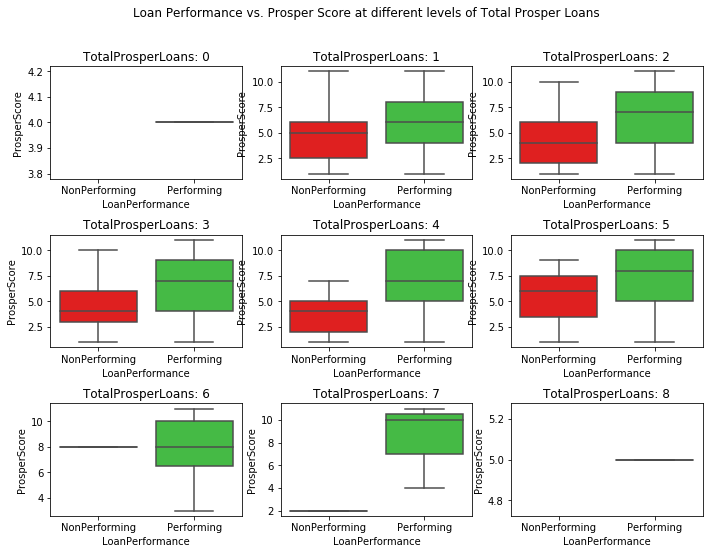

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(11.69, 8.27))
grouped = df.groupby('TotalProsperLoans')
ax = sns.boxplot(data=grouped.get_group(0.0), x='LoanPerformance', y='ProsperScore', palette=['red', 'limegreen'], ax=axes[0, 0]).set_title('TotalProsperLoans: 0')
ax = sns.boxplot(data=grouped.get_group(1.0), x='LoanPerformance', y='ProsperScore', palette=['red', 'limegreen'], ax=axes[0, 1]).set_title('TotalProsperLoans: 1')
ax = sns.boxplot(data=grouped.get_group(2.0), x='LoanPerformance', y='ProsperScore', palette=['red', 'limegreen'], ax=axes[0, 2]).set_title('TotalProsperLoans: 2')
ax = sns.boxplot(data=grouped.get_group(3.0), x='LoanPerformance', y='ProsperScore', palette=['red', 'limegreen'], ax=axes[1, 0]).set_title('TotalProsperLoans: 3')
ax = sns.boxplot(data=grouped.get_group(4.0), x='LoanPerformance', y='ProsperScore', palette=['red', 'limegreen'], ax=axes[1, 1]).set_title('TotalProsperLoans: 4')
ax = sns.boxplot(data=grouped.get_group(5.0), x='LoanPerformance', y='ProsperScore', palette=['red', 'limegreen'], ax=axes[1, 2]).set_title('TotalProsperLoans: 5')
ax = sns.boxplot(data=grouped.get_group(6.0), x='LoanPerformance', y='ProsperScore', palette=['red', 'limegreen'], ax=axes[2, 0]).set_title('TotalProsperLoans: 6')
ax = sns.boxplot(data=grouped.get_group(7.0), x='LoanPerformance', y='ProsperScore', palette=['red', 'limegreen'], ax=axes[2, 1]).set_title('TotalProsperLoans: 7')
ax = sns.boxplot(data=grouped.get_group(8.0), x='LoanPerformance', y='ProsperScore', palette=['red', 'limegreen'], ax=axes[2, 2]).set_title('TotalProsperLoans: 8')
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Loan Performance vs. Prosper Score at different levels of Total Prosper Loans')
plt.show()

## Prosper Rating vs. Non-Performing Loans
As observed previously too, Prosper’s risk rating system is fairly predictive in identifying the group of loans that has a higher chance to eventually default. Indeed, over 8% of “high-risk” HR loans and around 10% of D loans have failed to perform, while less than 3% of “low-risk” AA loans have defaulted (or been charged off). The risk ratings in between decline in an almost linear fashion going down the scale of riskiness with an exception of loans with Prosper rating of D.

However, looking at the loans on a quarterly basis shows that the Prosper Rating is not necessarily as predictive at smaller sample sizes. There are many(a lot) quarters in which E-, D-, or sometimes even B-rated loans end up with higher non-performance rates than HR loans. The data is chunkier from quarter to quarter, as opposed to over the whole sample size.

Since this data provided is only till early 2014, so one limitation ust be considered that all of the loans which didn't matured till that time period were put in the performing bucket while doing the analysis.

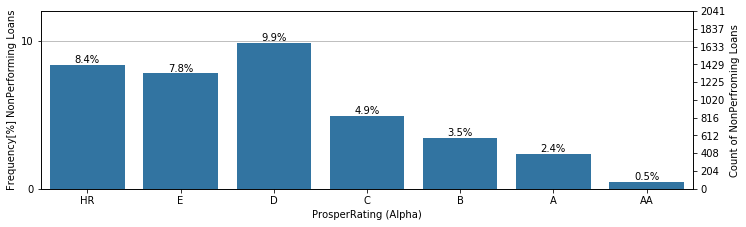

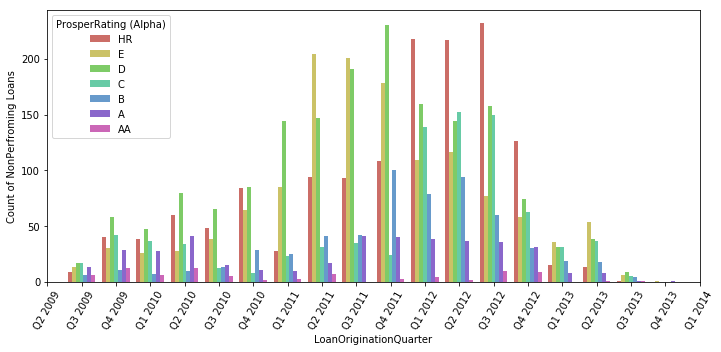

In [7]:
# --------------------------------------- PLOT 1 ---------------------------------------
default_color = sns.color_palette()[0]
plt.figure(figsize=(11.69, 3.27))
ncount = len(df.groupby('LoanPerformance').get_group('NonPerforming'))
ax = sns.countplot(x='ProsperRating (Alpha)', data=df.groupby('LoanPerformance').get_group('NonPerforming'), color=default_color)
# Make twin axis 
ax2=ax.twinx()
# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency[%] NonPerforming Loans')
ax.set_ylabel('Count of NonPerfroming Loans')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
ax2.set_ylim(0,12)
ax.set_ylim(0,2041)
# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

plt.show()

# --------------------------------------- PLOT 2 ---------------------------------------

plt.figure(figsize=(11.69, 5))
ax = sns.countplot(data=df.groupby('LoanPerformance').get_group('NonPerforming'), x='LoanOriginationQuarter', hue='ProsperRating (Alpha)', palette=sns.hls_palette(7))
plt.xticks(rotation=60)
plt.ylabel('Count of NonPerfroming Loans')
plt.xlim(14, 33)
plt.show()

## Debt-to-Income-Ratio vs. Estimated Loss/Estimated Return/On-Time Payments
In this visualization dark colored dots are visible which denotes higher(low risk) Prosper Score.<br>
If the debt to income ratio are low, the prosper score lies on the lowest risk side given that estimated loss is low or estimated return is high.<br>
As the estimated loss becomes high, the prosper score tends to shift towards high risk side irrespective of the debt to income ratio.<br>
Overall it could be concluded that for borrowers with low debt to income ratio if the Prosper score is high(low risk), then the estimated loss is low and estimated return is low too.<br>
Also it can be seen that borrowers with low debt to income ratio tend to take more loans but also have high Prosper scores and make on time payments as compared to their counterparts with high debt to income ratio.

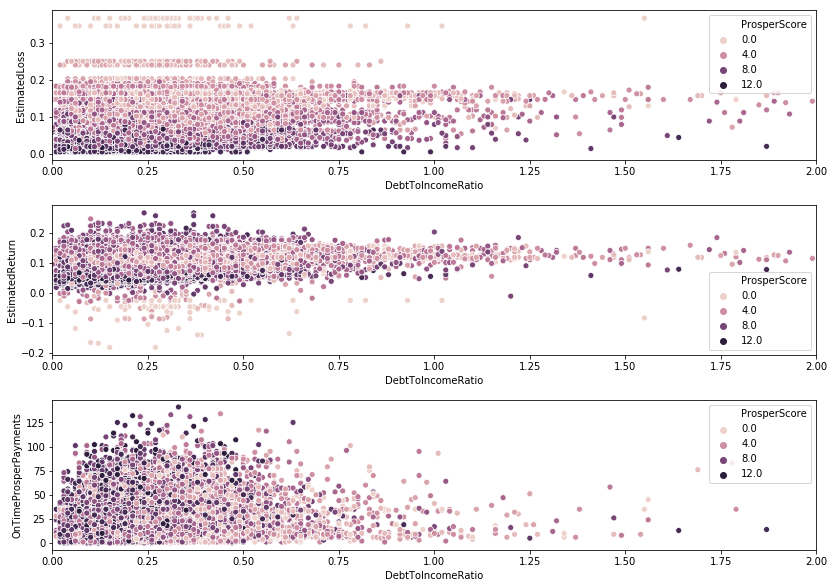

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(11.69, 8.27))

# --------------------------------------- PLOT 1 ---------------------------------------
sns.scatterplot(data=df, x='DebtToIncomeRatio', y='EstimatedLoss', hue='ProsperScore', ax=ax1)
ax1.set_xlim(0, 2)

# --------------------------------------- PLOT 2 ---------------------------------------
sns.scatterplot(data=df, x='DebtToIncomeRatio', y='EstimatedReturn', hue='ProsperScore', ax=ax2)
ax2.set_xlim(0, 2)

# --------------------------------------- PLOT 3 ---------------------------------------

sns.scatterplot(data=df, x='DebtToIncomeRatio', y='OnTimeProsperPayments', hue='ProsperScore', ax=ax3)
ax3.set_xlim(0, 2)

plt.tight_layout() 
plt.show()

> Check the output by using nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide.